# BIA 6304 Final Project - Pre game analysis

## By Andrew Pierson and Kristopher Profit

The Kansas City Chiefs football team is debateably one of the hottest teams in the NFL, with 4 wins and 0 losses during 1 home game and 3 away games. 

### Import Packages and Data

In [0]:
# import module(s) into namespace
import pandas as pd   #we almost always need pandas because we like data frames
from bs4 import BeautifulSoup
import requests
import csv
from __future__ import division
pd.set_option('display.max_colwidth', 150) 

In [2]:
!pip install tweepy
import tweepy
from tweepy import OAuthHandler


consumer_key =  'YjZ77yjePvArLtnp4WOBJm6fP'
consumer_secret = 'VIiA3zN1jntdab1QRDEYjCZ4gYAa8tU1mxi3LMqjqjmHMz7iVm'
access_token= '1032395859898626050-WBTdOzBydYK4odmPXy9Ngx5JVLMYTz'
access_secret= 'XnbpZvdNWxHShzdnlrDkyyuxcMJbPQraWFIIdt1IgfWxu'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 


api = tweepy.API(auth)

In [3]:
#Define an empty dataframe to create a list of tweets that can be printed
results = []

#Define the variables to be used in the api search
latitude = 39.0427
longitude = -94.4837
max_range = 50
hashtag = '#Chiefs'

#Get the first 5000 items based on the search query
for tweet in tweepy.Cursor(api.search, q = hashtag, geocode = '%f,%f,%dkm' % (latitude, longitude, max_range) ).items(1500):
    results.append(tweet)

#Verify the number of list items is 1500
print('API Call Output Type: ', type(results))
print('Tweet Objects: ', len(results))

API Call Output Type:  <class 'list'>
Tweet Objects:  1500


Calling Jacksonville by the county it rests in, Duval, was popularized by rappers in the 1990s, and it has slowly crept its way into game day at EverBank Field.

"Duuuval!" became a rallying cry for Jags since beginning in the early '00s. 

In [4]:
#Define an empty dataframe to create a list of tweets that can be printed
results2 = []

#Define the variables to be used in the api search
latitude2 = 30.3322
longitude2 = -81.6557
max_range2 = 50
hashtag2 = '#DUUUVAL'

#Get the first 1500 items based on the search query
for tweet in tweepy.Cursor(api.search, q = hashtag2, geocode = '%f,%f,%dkm' % (latitude2, longitude2, max_range2) ).items(1500):
    results2.append(tweet)

#Verify the number of list items is 1500
print('API Call Output Type: ', type(results2))
print('Tweet Objects: ', len(results2))

API Call Output Type:  <class 'list'>
Tweet Objects:  1500


## Choose Tweet Objects to mine

* Hashtags included in tweet objects will be important in this project when identifying fanbase loyalty.
* A total count of all of a user's tweets (including retweets and quote tweets) could be closely related to the number of a user's followers. In addition, users that have suspiciously small status counts might be omitted from the analysis due to misrepresentation of tweet population sample or because they are spam accounts.
* The verified tweet object is a boolean value that distinguishes people of interest, such as celebrities or politicians, from normal twitter users.
* Mentions on a tweet will help keep us informed of what people are sharing with others about The Kansas City Chiefs' Organization.
* The language on a majority of these tweets will likely be English (en), other languages have a higher chance of misrepresenting our sample data by including irrelevant tweet objects.
* I chose to include the text object from tweets that contain '#Chiefs' in order to find twitter users interested in the NFL team during the Kansas City Chiefs' preseason. This object was also chosen because it will likely provide insightful text that can be used to determine the underlying sentiment of a user towards the Chiefs. 
* The next two tweet objects that I chose to include in my data frame were the retweet and favorite counts for tweets including '#Chiefs' in their tags. Retweet and favorite counts can be useful when analyzing popularity of a tweet and will likely require different weights if a user is favoriting tweets more often than retweeting. 
* Including the created_at tweet object was done in order to allow the data frame to be sorted in chronological order upon anlysis. This might show trends in popularity or sentiment depending upon the Chiefs performance after a game. 
* A user's name and account description might also allow us to predict the tweet's sentiment, which is why I chose to mine user.name and user.description tweet objects. A case in which this may occur is if an opposing team's fans are including "#Chiefs" in a tweet that has a negative connotation. 
* The user.followers_count object was also  included and could provide interesting information, analyzing this using a forecasting method may indicate impressions on other users. 


In [0]:
#Create a function to convert a given list of tweets into a Pandas DataFrame
#The DataFrame will consist of only chosen values below

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['TweetHashtags'] = [tweet.entities.get('hashtags') for tweet in tweets]
    DataSet['UserStatusCount'] = [tweet.user.statuses_count for tweet in tweets]
    DataSet['UserVerified'] = [tweet.user.verified for tweet in tweets]
    #DataSet['TweetMentions'] = [tweet.entities.get('user_mentions') for tweet in tweets]
    DataSet['TweetLanguage'] = [tweet.lang for tweet in tweets]
    DataSet['TweetText'] = [tweet.text for tweet in tweets]
    DataSet['TweetRetweetCount'] = [tweet.retweet_count for tweet in tweets]
    DataSet['TweetFavoriteCount'] = [tweet.favorite_count for tweet in tweets]
    DataSet['TweetCreated'] = [tweet.created_at for tweet in tweets]
    #DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    #DataSet['UserFollowerCount'] = [tweet.user.followers_count for tweet in tweets]

    return DataSet

## Create and Populate Data Frames

### Chiefs Data Frame

In [6]:
#Pass the tweets list to create a DataFrame
chiefs_frame = toDataFrame(results)
print('Dataframe Shape (Rows, Columns): ', chiefs_frame.shape)

Dataframe Shape (Rows, Columns):  (1500, 9)


In [7]:
chiefs_frame['TweetText'][0:10]

0               SHOWTIME GONNA BRING THE MOTHERFUCKING PAIN! and I’m gonna make some chicken wings. #chiefs #ChiefsKingdom https://t.co/nVtNVd455w
1    GAME DAY || Biggest game of the season, the MVP looks ready to take it on. •••https://t.co/i277X1XX0y•••\n•\n••\n•••… https://t.co/LsbBQ35n8A
2           @jalenramsey had a few things to say this week...\n\nFortunately, cheetah gets to have the final word, today.… https://t.co/K45gmnteMg
3                                                        @ArrowheadPride Who are the #Chiefs wanting to trade for to upgrade the safety position ?
4        Game will be on &amp; no poncho needed!! $4 any draft, $8.99 any slice with any pint.....!! #papakenoscrossroads… https://t.co/6Ef7TeuWLN
5         Lots of #rain here in #KansasCity for the #CHIEFS - #Jaguars today...1.97" last 24 hrs. ... view off my deck.... https://t.co/bE0EDblNfO
6                            RT @Gezee80: This rain ain’t stopping the faithful. Let’s get this W!! #ChiefsKingdom #Ch

In [8]:
chiefs_frame.head()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
0,"[{'text': 'chiefs', 'indices': [84, 91]}, {'text': 'ChiefsKingdom', 'indices': [92, 106]}]",7400,False,en,SHOWTIME GONNA BRING THE MOTHERFUCKING PAIN! and I’m gonna make some chicken wings. #chiefs #ChiefsKingdom https://t.co/nVtNVd455w,0,2,2018-10-07 14:39:50,"MFA @umkansascity I write short stories. I adore comics and graphic novels. Sometimes, I complain about the state of things. Follow me and let’s n..."
1,[],1191,False,en,"GAME DAY || Biggest game of the season, the MVP looks ready to take it on. •••https://t.co/i277X1XX0y•••\n•\n••\n•••… https://t.co/LsbBQ35n8A",1,0,2018-10-07 14:33:17,"Handcrafted fine beard oils, balms and waxes. 100% organic products. 100% organic manliness. Exclusive sponsor for @AHPKC."
2,[],474,False,en,"@jalenramsey had a few things to say this week...\n\nFortunately, cheetah gets to have the final word, today.… https://t.co/K45gmnteMg",0,0,2018-10-07 14:32:23,"Modern Man Supply Co. is a bodega style men's store. If is was designed with a man in mind, we will carry it."
3,"[{'text': 'Chiefs', 'indices': [28, 35]}]",1142,False,en,@ArrowheadPride Who are the #Chiefs wanting to trade for to upgrade the safety position ?,0,0,2018-10-07 14:31:22,"I Love Sports , Love God , Very Conservative , Work Lenexa Rec Center and was born with Cerebral Palsy.\nSnapchat: connor_miller79"
4,"[{'text': 'papakenoscrossroads', 'indices': [92, 112]}]",243,False,en,"Game will be on &amp; no poncho needed!! $4 any draft, $8.99 any slice with any pint.....!! #papakenoscrossroads… https://t.co/6Ef7TeuWLN",0,0,2018-10-07 14:22:59,


### Jaguars Data Frame

In [9]:
#Pass the tweets list to create a DataFrame
jaguars_frame = toDataFrame(results2)
print('Dataframe Shape (Rows, Columns): ', jaguars_frame.shape)

Dataframe Shape (Rows, Columns):  (1500, 9)


In [10]:
jaguars_frame['TweetText'][0:10]

0         RT @FPC_Jaguars: Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n
1          Patty Cajones gonna learn today @michaelirvin88 less than 300 yards, less than 5 TDs and 1+ INT is my bold predicti… https://t.co/tsPU2fLHXi
2                                                        RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy
3                                                        RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy
4    RT @ActionNewsJax: #JAXvsKC Sunday Football!! \n\n🏈Countdown to Kickoff: 11:30 a.m. on CBS47 \n\n🏈 Kickoff: 1 p.m. on CBS47 \n\n🏈 LIVE UPDATES: h…
5                          Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n
6                                                                                 RT @Ja

In [11]:
jaguars_frame.head()

,TweetHashtags,UserStatusCount,UserVerified,TweetLanguage,TweetText,TweetRetweetCount,TweetFavoriteCount,TweetCreated,userDesc
0,"[{'text': 'JAXvsKC', 'indices': [82, 90]}, {'text': 'DUUUVAL', 'indices': [91, 99]}, {'text': 'ChiefsKingdom', 'indices': [100, 114]}]",4784,False,en,"RT @FPC_Jaguars: Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n",1,0,2018-10-07 15:09:14,I absolutely love football. Managing Editor for @FPC_JAGUARS 🐆
1,[],374,False,en,"Patty Cajones gonna learn today @michaelirvin88 less than 300 yards, less than 5 TDs and 1+ INT is my bold predicti… https://t.co/tsPU2fLHXi",0,0,2018-10-07 15:08:18,General Manager @ViceBros + Streamer on Twitch: https://t.co/VETJmnjoZH Instagram: https://t.co/zvnHOUOwlt YouTube: https://t.co/ul6P6TrE1H
2,"[{'text': 'DUUUVAL', 'indices': [55, 63]}]",70095,False,en,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,60,0,2018-10-07 15:08:02,"mom of 3,DIY and fashion obsessed,\nplease click my link below to my etsy page for 1 of kind super cute jewelry line!! \n#divinedesignstudio\nhttp..."
3,"[{'text': 'DUUUVAL', 'indices': [55, 63]}]",9475,False,en,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,60,0,2018-10-07 15:07:56,
4,"[{'text': 'JAXvsKC', 'indices': [19, 27]}]",28648,False,en,RT @ActionNewsJax: #JAXvsKC Sunday Football!! \n\n🏈Countdown to Kickoff: 11:30 a.m. on CBS47 \n\n🏈 Kickoff: 1 p.m. on CBS47 \n\n🏈 LIVE UPDATES: h…,1,0,2018-10-07 15:07:46,"Stl Cardinals , Stl Blues, and a Jax Jags fan now loving my new saltlife in Jacksonville. US veteran, golfer, joker, cigar smoker! And loving the..."


---

## Count Vectorizer

In [0]:
#Import pandas into the workspace
import pandas as pd
#Import numpy into the workspace
import numpy as np
#Import the CountVectorizer module
from sklearn.feature_extraction.text import CountVectorizer
#Import the math function to do math
import math
#Specify the max width of pixels per column for text that will be analyzed
pd.set_option('display.max_colwidth', 800)

### Count Vectorizer Summary

cv1
*   Parameters: stop_words='english'
*   Feature Space: 1113

cv2
*   Parameters: stop_words='stopwords'
*   Feature Space: 1106

### CV1

In [0]:
#Define the count vectorizer using default parameters
cv1 = CountVectorizer(stop_words='english')

#### Chiefs Feature Space

In [15]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv1_chiefs_text = cv1.fit_transform(chiefs_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv1_chiefs_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv1_chiefs_text))

Shape: (1500, 2529)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [16]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv1_chiefs_text.toarray(), columns = cv1.get_feature_names()).head(10)

,0ihsjqjlxx,0jx4cm7nzp,0lrjiymqgp,0r7q3ilqqe,0sk6dl9iui,0vl7dp9mx8,0yuf95arsf,10,100,1000,...,zcntelohdx,zfvolw9nki,zhdehy5nfx,zid01sjolf,zone,zrometejcm,zudckibfyt,zuzfkivu55,zvsbfhzilb,zy4la95keh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occurring terms:

In [17]:
names = cv1.get_feature_names()   #create list of feature names

count = np.sum(cv1_chiefs_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(25)

,count
chiefs,1275
rt,932
https,858
mahomes,285
patrick,201
mitchschwartz72,140
game,129
looks,127
chiefskingdom,125
mattderrick,123


#### Jaguars Feature Space

In [19]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv1_jaguars_text = cv1.fit_transform(jaguars_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv1_jaguars_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv1_jaguars_text))

Shape: (1500, 1611)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [21]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv1_jaguars_text.toarray(), columns = cv1.get_feature_names()).head(10)

,00,04,084axs4vu7,0d1ulua2ri,0dx6a0nb,0dx6a0nbet,0hdg2nlvnf,0o3bef0vwa,0uqf9ccxn8,10,...,zct7,zct7zguez6,zdi9snksuj,zero,zeyrgl09xt,zougurl5,zr6skkxxd7,zt5iocnpdo,zvfbjlixzv,zyguc2ptr7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Most frequently occurring terms

In [22]:
names = cv1.get_feature_names()   #create list of feature names

count = np.sum(cv1_jaguars_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(25)

,count
duuuval,1382
https,1353
jaguars,1244
rt,1178
game,359
day,279
run,215
ny,193
3z1bvxzrbj,189
arrowhead,138


### CV2

Create custom stopwords list to remove unhelpful words for next count vectorizer

In [0]:
from sklearn.feature_extraction import text
# Add more stopwords to standard english 
mylist = ['rt', '&', 'amp','pff','http','website','retweet','fi','fbs','https','years','uh2bpyg3gu','just','calling','intervi','traffic','shut']
stopwords = text.ENGLISH_STOP_WORDS.union(mylist)

In [0]:
#Define the count vectorizer using stopwords custom parameter
cv2 = CountVectorizer(stop_words=stopwords, min_df = .02)

#### Chiefs Feature Space

In [26]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv2_chiefs_text = cv2.fit_transform(chiefs_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv2_chiefs_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv2_chiefs_text))

Shape: (1500, 105)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [27]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv2_chiefs_text.toarray(), columns = cv2.get_feature_names()).head(10)

,100,12,2nwchyfknd,567synhihb,andy,appreciate,arrowheadpride,baby,berry,briefly,...,today,tomkctv5,ve,victory,vs,way,week,win,won,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occurring terms:

In [28]:
names = cv2.get_feature_names()   #create list of feature names

count = np.sum(cv2_chiefs_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
chiefs,1275
mahomes,285
patrick,201
mitchschwartz72,140
game,129
looks,127
chiefskingdom,125
mattderrick,123
today,122
love,119


#### Jaguars Feature Space

In [29]:
#Apply the count vectorizer for the bag of words to the dataframe feature
cv2_jaguars_text = cv2.fit_transform(jaguars_frame['TweetText'])
#This is the feature space for TweetText
print('Shape:', cv2_jaguars_text.shape)
#This is the type of matrix that is returned for TweetText
print('Type:', type(cv2_jaguars_text))

Shape: (1500, 55)
Type: <class 'scipy.sparse.csr.csr_matrix'>


In [30]:
#Print the sparse matrix as a data frame for an aestheticallly pleasing view of the feature space head#Print t 
pd.DataFrame(cv2_jaguars_text.toarray(), columns = cv2.get_feature_names()).head(10)

,04,10,24,3z1bvxzrbj,4j7lqb7cww,arrowhead,black,bortles,career,catch,...,tops,victorymonday,vryoriwrbt,vs,wanna,week,white,win,work,yp2g7bj79n
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most frequently occurring terms:

In [31]:
names = cv2.get_feature_names()   #create list of feature names

count = np.sum(cv2_jaguars_text.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list

sorted_count = count_df.sort_values(['count'], ascending = False)
sorted_count.head(15)

,count
duuuval,1382
jaguars,1244
game,359
day,279
run,215
ny,193
3z1bvxzrbj,189
arrowhead,138
black,134
headed,132


---

## Sentiment Analysis

Sentiment analysis will be performed to gain insight into the the tone of Tweets regarding Kavanaugh. The results will be used to generate a target variable for predictive modeling.

### Sentiment Analysis Summary

AFINN Dictionary
*   Rendered all tweets as being neutral in sentiment

HL Dictionary
*   

### AFINN Dictionary

#### Define AFINN classes

This part is to allow google collaboratory to upload locally saved files into the drive

In [36]:
#Use google.colab to import dictionaries
from google.colab import files

#Choose file(s) to upload
uploaded = files.upload()

Saving AFINN-111.txt to AFINN-111 (1).txt
Saving HLneg.txt to HLneg.txt
Saving HLpos.txt to HLpos.txt


In [37]:
#Run foreloop to execute the file upload
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "AFINN-111.txt" with length 28093 bytes
User uploaded file "HLneg.txt" with length 44758 bytes
User uploaded file "HLpos.txt" with length 19093 bytes


In [38]:
# Sentiment dictionary that assigns scores to words signifying their sentiment polarity or neutrality

afinn = {}
for line in open("AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [0]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# you can return a number or a label

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

#### Chiefs AFINN Sentiment

In [40]:
chiefs_frame['afinn'] = chiefs_frame["TweetText"].apply(lambda x: afinn_sent(x))
print(type(chiefs_frame['TweetText']))

<class 'pandas.core.series.Series'>


In [41]:
chiefs_frame.iloc[0:10][['TweetText','afinn']]

,TweetText,afinn
0,SHOWTIME GONNA BRING THE MOTHERFUCKING PAIN! and I’m gonna make some chicken wings. #chiefs #ChiefsKingdom https://t.co/nVtNVd455w,Neutral
1,"GAME DAY || Biggest game of the season, the MVP looks ready to take it on. •••https://t.co/i277X1XX0y•••\n•\n••\n•••… https://t.co/LsbBQ35n8A",Neutral
2,"@jalenramsey had a few things to say this week...\n\nFortunately, cheetah gets to have the final word, today.… https://t.co/K45gmnteMg",Neutral
3,@ArrowheadPride Who are the #Chiefs wanting to trade for to upgrade the safety position ?,Positive
4,"Game will be on &amp; no poncho needed!! $4 any draft, $8.99 any slice with any pint.....!! #papakenoscrossroads… https://t.co/6Ef7TeuWLN",Negative
5,"Lots of #rain here in #KansasCity for the #CHIEFS - #Jaguars today...1.97"" last 24 hrs. ... view off my deck.... https://t.co/bE0EDblNfO",Neutral
6,RT @Gezee80: This rain ain’t stopping the faithful. Let’s get this W!! #ChiefsKingdom #Chiefs https://t.co/N4XBAEZPp4,Positive
7,Listening to @SportsRadio810 for #Chiefs pregame! No other sports station comes close! Go CCHHIIEEFFSS!! #810SportsRadio,Neutral
8,Rainy day here! Good day to watch #Chiefs🏈 #Brewers ⚾️ #Dodgers ⚾️ and #Cowboys🏈 #HR4HR,Neutral
9,"How many loans could Mahomes own on homes, if owned homes could be loaned by Mahomes? #Chiefs",Neutral


In [42]:
chiefs_frame.iloc[1490:1501][['TweetText','afinn']]

,TweetText,afinn
1490,RT @Grand_Larsony: So this is what it feels like to have a franchise qb? #bonertown #chiefs,Positive
1491,RT @JeremySickel: Find somebody that looks at you the way Kareem Hunt looks at Patrick Mahomes. #Chiefs https://t.co/567syNHIhb,Neutral
1492,@John_Caddell #Chiefs,Neutral
1493,These guys\n#Chiefs #ChiefsKingdom https://t.co/5VJgeQo7t5,Neutral
1494,RT @ClayWendler: Bye Denver. #Chiefs https://t.co/qe1mZK01Cm,Neutral
1495,RT @JeremySickel: Find somebody that looks at you the way Kareem Hunt looks at Patrick Mahomes. #Chiefs https://t.co/567syNHIhb,Neutral
1496,"That left hand tho.... 😮❤️💛😁 stressful, but what a win! #KCvsDEN #ChiefsKingdom #Chiefs #Mahomes https://t.co/2bgQLJ1X0M",Positive
1497,RT @canuck4: Mahomes just threw that left handed!!!! #Chiefs #ChiefsKingdom,Neutral
1498,Is this how you all feel with TB12 every week? We deserve it. Mahomes has ice in his veins. #Chiefs https://t.co/8gEKOlyRfm,Neutral
1499,A live look at @Broncos fans thinking about @PatrickMahomes5 @Chiefs .... #ChiefsKingdom #KansasCity #Chiefs 🏈🏈🏈🏈🏈… https://t.co/FeD2OjWmE6,Neutral


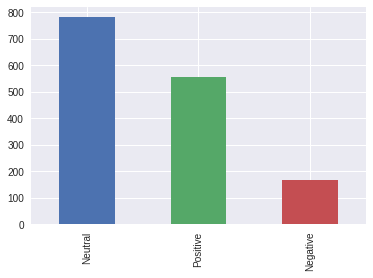

In [43]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['afinn'].value_counts().plot(kind='bar')

#### Jaguars AFINN Sentiment

In [45]:
jaguars_frame['afinn'] = jaguars_frame["TweetText"].apply(lambda x: afinn_sent(x))
print(type(jaguars_frame['TweetText']))

<class 'pandas.core.series.Series'>


In [46]:
jaguars_frame.iloc[0:10][['TweetText','afinn']]

,TweetText,afinn
0,"RT @FPC_Jaguars: Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n",Neutral
1,"Patty Cajones gonna learn today @michaelirvin88 less than 300 yards, less than 5 TDs and 1+ INT is my bold predicti… https://t.co/tsPU2fLHXi",Positive
2,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,Neutral
3,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,Neutral
4,RT @ActionNewsJax: #JAXvsKC Sunday Football!! \n\n🏈Countdown to Kickoff: 11:30 a.m. on CBS47 \n\n🏈 Kickoff: 1 p.m. on CBS47 \n\n🏈 LIVE UPDATES: h…,Neutral
5,"Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n",Neutral
6,RT @Jaguars: Ready to go to work.\n\n#DUUUVAL https://t.co/ilMaq0vLIM,Neutral
7,RT @Jaguars: Ready to go to work.\n\n#DUUUVAL https://t.co/ilMaq0vLIM,Neutral
8,"My prediction for today’s game: it’s a story as old as time. Offense wins games, defense wins championships. Marron… https://t.co/CkHAvLorBy",Positive
9,#DUUUVAL https://t.co/zyguC2PTR7,Neutral


In [47]:
jaguars_frame.iloc[1490:1501][['TweetText','afinn']]

,TweetText,afinn
1490,RT @Jaguars: Untouched.\n\n@T_Yeldon walks into the endzone!\n\n#DUUUVAL https://t.co/Mvx0HnDUXm,Neutral
1491,RT @Jaguars: It was only a matter of time.\n\n@YannGetSacks91 end the half with a sack. #DUUUVAL https://t.co/zEYRgL09XT,Positive
1492,RT @Jaguars: A score on every possession. Now let's finish it.\n\n#DUUUVAL https://t.co/o2AOUHBvBR,Neutral
1493,RT @Jaguars: 🙏 for @Campbell93 and this defense!\n\n#DUUUVAL https://t.co/DhApPzCsoO,Neutral
1494,"RT @Jaguars: The catch, the run, the celebration for@drm_12.\n\n#DUUUVAL https://t.co/bepFSZFgfd",Neutral
1495,RT @Jaguars: Only 1 quarter left.\n\n#DUUUVAL https://t.co/aqK0nEX1cp,Neutral
1496,"RT @Jaguars: Career high 9 catch, 130 yards for @DedeTHEGreat11 \n\n#DUUUVAL https://t.co/tsJsdgBmNZ",Neutral
1497,RT @Jaguars: We run NY. #DUUUVAL https://t.co/3Z1bvXZrBJ,Neutral
1498,RT @Jaguars: We run NY. #DUUUVAL https://t.co/3Z1bvXZrBJ,Neutral
1499,RT @Jaguars: Celebrating a career-high game for @DedeTHEGreat11 with a #DUUUVAL https://t.co/4j7lqb7cWw,Neutral


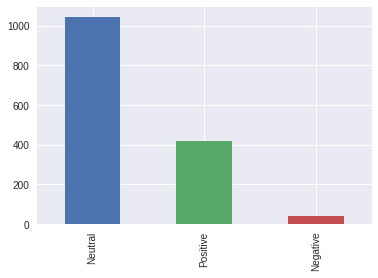

In [48]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['afinn'].value_counts().plot(kind='bar')

### HL Dictionary

#### Define HL classes

In [51]:
HLpos = "HLpos.txt"
HLneg = "HLneg.txt"
print("HL pos  size: " + str(len(HLpos)))
print(HLpos[0:10])
print("HL neg  size: " + str(len(HLneg)))
print(HLneg[0:10])

# different dictionary
# different measure

def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
     
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

HL pos  size: 9
HLpos.txt
HL neg  size: 9
HLneg.txt


#### Chiefs HL Sentiment

In [0]:
chiefs_frame['hlsent'] = chiefs_frame["TweetText"].apply(lambda x: hl_sent(x))

In [53]:
chiefs_frame.iloc[0:10][['TweetText','afinn', 'hlsent']]

,TweetText,afinn,hlsent
0,SHOWTIME GONNA BRING THE MOTHERFUCKING PAIN! and I’m gonna make some chicken wings. #chiefs #ChiefsKingdom https://t.co/nVtNVd455w,Neutral,Neutral
1,"GAME DAY || Biggest game of the season, the MVP looks ready to take it on. •••https://t.co/i277X1XX0y•••\n•\n••\n•••… https://t.co/LsbBQ35n8A",Neutral,Neutral
2,"@jalenramsey had a few things to say this week...\n\nFortunately, cheetah gets to have the final word, today.… https://t.co/K45gmnteMg",Neutral,Neutral
3,@ArrowheadPride Who are the #Chiefs wanting to trade for to upgrade the safety position ?,Positive,Positive
4,"Game will be on &amp; no poncho needed!! $4 any draft, $8.99 any slice with any pint.....!! #papakenoscrossroads… https://t.co/6Ef7TeuWLN",Negative,Neutral
5,"Lots of #rain here in #KansasCity for the #CHIEFS - #Jaguars today...1.97"" last 24 hrs. ... view off my deck.... https://t.co/bE0EDblNfO",Neutral,Positive
6,RT @Gezee80: This rain ain’t stopping the faithful. Let’s get this W!! #ChiefsKingdom #Chiefs https://t.co/N4XBAEZPp4,Positive,Neutral
7,Listening to @SportsRadio810 for #Chiefs pregame! No other sports station comes close! Go CCHHIIEEFFSS!! #810SportsRadio,Neutral,Neutral
8,Rainy day here! Good day to watch #Chiefs🏈 #Brewers ⚾️ #Dodgers ⚾️ and #Cowboys🏈 #HR4HR,Neutral,Neutral
9,"How many loans could Mahomes own on homes, if owned homes could be loaned by Mahomes? #Chiefs",Neutral,Neutral


At first glance, it is clear that the HL dictionary has labeled the tweet sentiments with higher polarity. The distribution of the senitment labels will be illustrated below.

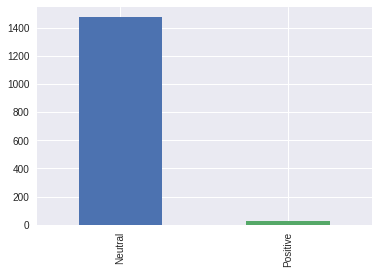

In [55]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['hlsent'].value_counts().plot(kind='bar')

Although the neutral sentiment label still holds a large majority in the senitment distribution, there are enough negative and positive sentiment labels to aid in the analysis. The even distribution between negative and positive labels is interesting. Since the Tweets were scraped from the day when the FBI released its investigation of sexual assault allegations, and since news has indicated that the FBI did not find any incriminating evidence, it makes sense that there would be an even split on either side's sentiment. It may be too early to determine this, however. 

#### Jaguars HL Sentiment

In [0]:
jaguars_frame['hlsent'] = jaguars_frame["TweetText"].apply(lambda x: hl_sent(x))

In [57]:
jaguars_frame.iloc[0:10][['TweetText','afinn', 'hlsent']]

,TweetText,afinn,hlsent
0,"RT @FPC_Jaguars: Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n",Neutral,Neutral
1,"Patty Cajones gonna learn today @michaelirvin88 less than 300 yards, less than 5 TDs and 1+ INT is my bold predicti… https://t.co/tsPU2fLHXi",Positive,Neutral
2,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,Neutral,Neutral
3,RT @Jaguars: It's 9:04 on game day!\n\nWe wanna hear you #DUUUVAL!!!!! https://t.co/P16PdB53yy,Neutral,Neutral
4,RT @ActionNewsJax: #JAXvsKC Sunday Football!! \n\n🏈Countdown to Kickoff: 11:30 a.m. on CBS47 \n\n🏈 Kickoff: 1 p.m. on CBS47 \n\n🏈 LIVE UPDATES: h…,Neutral,Neutral
5,"Today is the day. Less than 2 hours until game time, get pumped! #JAXvsKC #DUUUVAL #ChiefsKingdom\n\nhttps://t.co/z0M3eA5z7n",Neutral,Neutral
6,RT @Jaguars: Ready to go to work.\n\n#DUUUVAL https://t.co/ilMaq0vLIM,Neutral,Neutral
7,RT @Jaguars: Ready to go to work.\n\n#DUUUVAL https://t.co/ilMaq0vLIM,Neutral,Neutral
8,"My prediction for today’s game: it’s a story as old as time. Offense wins games, defense wins championships. Marron… https://t.co/CkHAvLorBy",Positive,Neutral
9,#DUUUVAL https://t.co/zyguC2PTR7,Neutral,Neutral


At first glance, it is clear that the HL dictionary has labeled the tweet sentiments with higher polarity. The distribution of the senitment labels will be illustrated below.

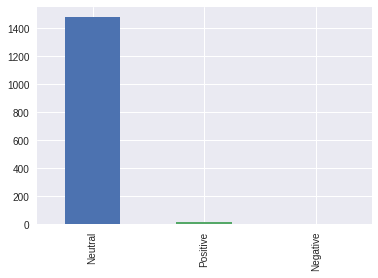

In [58]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['hlsent'].value_counts().plot(kind='bar')

Although the neutral sentiment label still holds a large majority in the senitment distribution, there are enough negative and positive sentiment labels to aid in the analysis. The even distribution between negative and positive labels is interesting. Since the Tweets were scraped from the day when the FBI released its investigation of sexual assault allegations, and since news has indicated that the FBI did not find any incriminating evidence, it makes sense that there would be an even split on either side's sentiment. It may be too early to determine this, however. 

## Amplification and Negation

We will add amplifying and negating weights onto the words in the Tweets to see if and how it affects the sentiment labels.

In [0]:
#more complicated sentiment calculations
#create all the dictionaries just once

#amplification and negation words from qdap
negate = ["aint", "arent","cant", "couldnt" , "didnt" , "doesnt" ,"dont" ,"hasnt" , 
          "isnt" ,"mightnt" , "mustnt" ,"neither" ,"never", "no" ,"nobody" , "nor", 
          "not" , "shant", "shouldnt", "wasnt" , "werent" ,"wont", "wouldnt"]
amplify = ["acute" ,"acutely", "certain", "certainly" ,"colossal", "colossally",
           "deep" , "deeply" , "definite","definitely" ,"enormous","enormously" , 
           "extreme", "extremely" ,"great","greatly" ,"heavily", "heavy", "high",
           "highly" ,"huge","hugely" , "immense", "immensely" ,"incalculable" ,
           "incalculably","massive", "massively", "more","particular" ,"particularly",
           "purpose", "purposely", "quite" ,"real" ,"really","serious", "seriously", 
           "severe","severely" ,"significant" ,"significantly","sure","surely" , "true" ,
           "truly" ,"vast" , "vastly" , "very"]

In [0]:
def hl_sent2(inputstring):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        if HLpos.count(word):
            if negate.count(prev):
                negcount += 1
            elif amplify.count(prev):
                poscount +=2
            else: 
                poscount +=1
        elif HLneg.count(word):
            if negate.count(prev):
                poscount += 1
            elif amplify.count(prev):
                negcount +=2
            else:
                negcount +=1
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone

### Chiefs Sentiment 

In [0]:
chiefs_frame['hl_sent2'] = chiefs_frame["TweetText"].apply(lambda x: hl_sent2(x))

In [63]:
chiefs_frame.iloc[490:501]['hl_sent2']

490    Neutral
491    Neutral
492    Neutral
493    Neutral
494    Neutral
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
500    Neutral
Name: hl_sent2, dtype: object

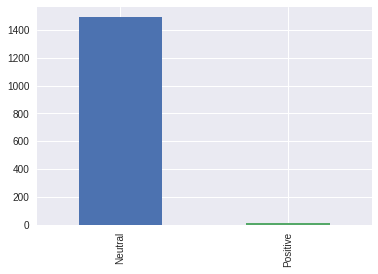

In [64]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
chiefs_frame['hl_sent2'].value_counts().plot(kind='bar')

Adding amplification and negation to the list of words does not seem to have changed anything in the distribution of sentiment labels. 

### Jaguars Sentiment

In [0]:
jaguars_frame['hl_sent2'] = jaguars_frame["TweetText"].apply(lambda x: hl_sent2(x))

In [66]:
jaguars_frame.iloc[490:501]['hl_sent2']

490    Neutral
491    Neutral
492    Neutral
493    Neutral
494    Neutral
495    Neutral
496    Neutral
497    Neutral
498    Neutral
499    Neutral
500    Neutral
Name: hl_sent2, dtype: object

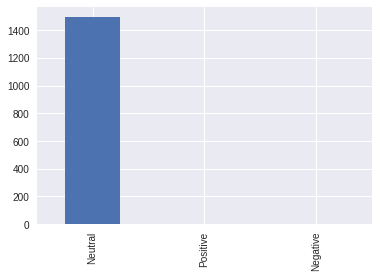

In [67]:
# What does the sentiment distribution look like?
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
jaguars_frame['hl_sent2'].value_counts().plot(kind='bar')

Adding amplification and negation to the list of words does not seem to have changed anything in the distribution of sentiment labels. 